Assignment on Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Read the dataset to python environment

In [ ]:
data=pd.read_excel('/content/iris new.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



2. Do the necessary pre-processing steps


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:

data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Filling the missing values

In [ ]:
data['SL'].fillna(round(data['SL'].median(),1),inplace=True)
data['SW'].fillna(round(data['SW'].median(),1),inplace=True)
data['PL'].fillna(round(data['PL'].median(),1),inplace=True)

data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,4.4,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking for outliers

Text(0.5, 1.0, 'box plot of sepal length')

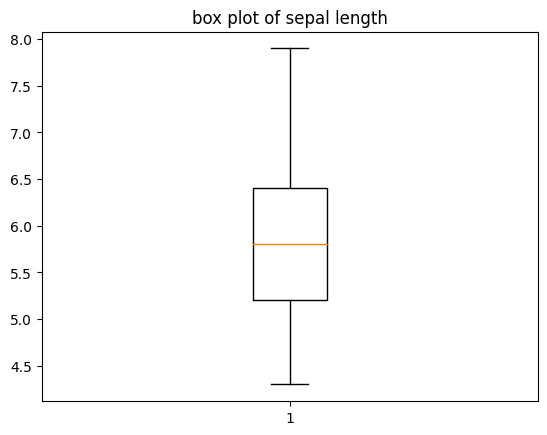

In [ ]:
plt.boxplot(data['SL'])
plt.title('box plot of sepal length')

Text(0.5, 1.0, 'box plot of sepal width')

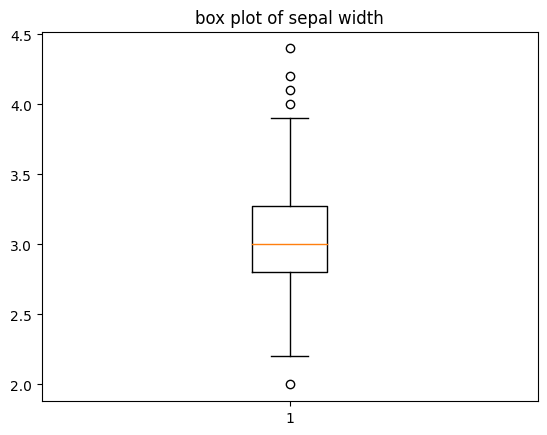

In [ ]:
plt.boxplot(data['SW'])
plt.title('box plot of sepal width')

Text(0.5, 1.0, 'box plot of petal length')

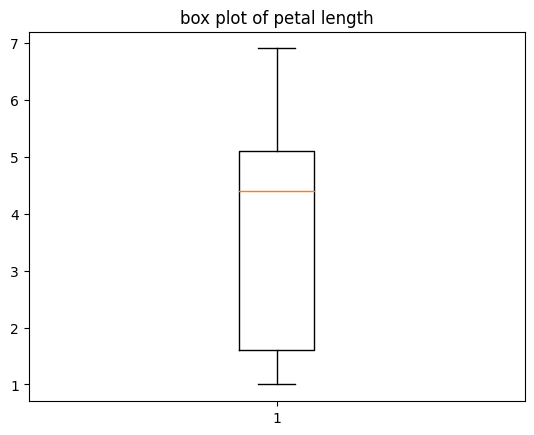

In [ ]:
plt.boxplot(data['PL'])
plt.title('box plot of petal length')

Text(0.5, 1.0, 'box plot of petal width')

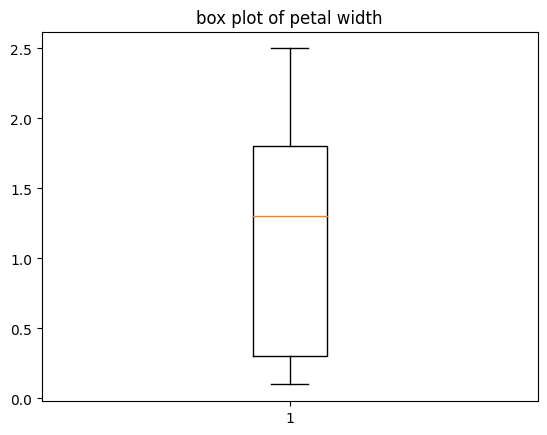

In [ ]:
plt.boxplot(data['PW'])
plt.title('box plot of petal width')

Removing outliers in SW

In [ ]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [ ]:
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')
print("Q1 is:" ,Q1)
print("Q2 is:" ,Q2)
print("Q3 is:" ,Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print("lower limit is:" ,low_lim)
print("upper limit is:" ,upp_lim)


Q1 is: 2.8
Q2 is: 3.0
Q3 is: 3.25
lower limit is: 2.1249999999999996
upper limit is: 3.9250000000000003


In [ ]:
outlier=[]
for x in data['SW']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
        print("\n")
        print(outlier)

In [ ]:
data['SW']=data['SW'].clip(lower=low_lim,upper=upp_lim)

Text(0.5, 1.0, 'box plot of sepal width')

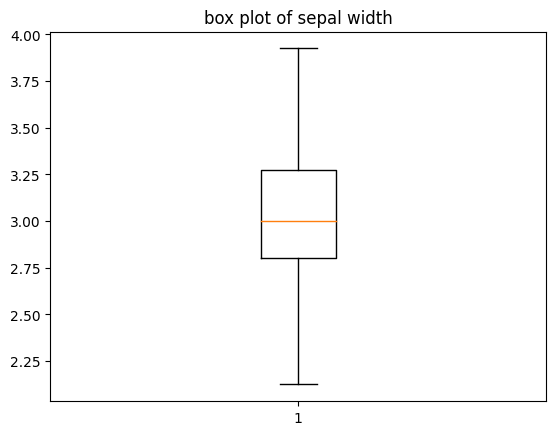

In [ ]:
plt.boxplot(data['SW'])
plt.title('box plot of sepal width')

In [ ]:
from sklearn import preprocessing
labl_encoder = preprocessing.LabelEncoder()
data['Classification']= labl_encoder.fit_transform(data['Classification'])
data

In [ ]:
x= data.drop('Classification',axis=1)
y = data['Classification']

from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lin_model=linear_model.LinearRegression()
model=lin_model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.037737904483964496
R squared value is  0.9460029983536279


Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)




In [ ]:
log_reg.fit(x_train,y_train)
y_log_pred=log_reg.predict(x_test)
y_log_pred

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('accuracy :',round(accuracy_score(y_test, y_log_pred)))
print('Precision :',round(precision_score(y_test, y_log_pred, average='micro')))
print('recall score :',round(recall_score(y_test, y_log_pred, average='micro')))
print('f1 score : ',round(f1_score(y_test, y_log_pred, average='micro')))

accuracy : 1
Precision : 1
recall score : 1
f1 score :  1


KNN

In [ ]:
X = data.drop('Classification',axis=1)
y = data['Classification']

from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski' ,p=2)
    classifier.fit(x_train, y_train)
    y_pred_knn  = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_knn)
    metric_k.append(accuracy)






Text(0, 0.5, 'Accuracy')

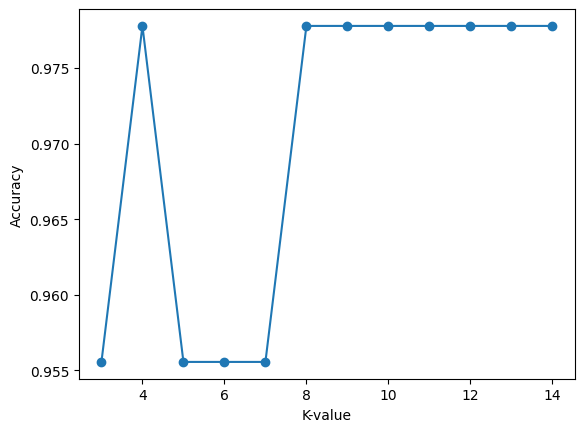

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('accuracy is: ',round(accuracy_score(y_test,y_pred_knn)))
print('Precision is: ',round(precision_score(y_test,y_pred_knn,average='micro')))
print('recall score is: ',round(recall_score(y_test,y_pred_knn,average='micro')))
print('f1 score is: ',round(f1_score(y_test,y_pred_knn,average='micro')))

accuracy is:  1
Precision is:  1
recall score is:  1
f1 score is:  1
